In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#นำเข้าข้อมูล
data = pd.read_csv('sanitary.csv')

In [3]:
data

brand   price    sale  total_sale       location   usage  length type  \
0       Sofy   10.75    74.0       795.5        Bangkok   night    29.0  pad   
1       Sofy   33.00  3269.0    107877.0        Bangkok     day    22.0  pad   
2       Sofy   11.00   748.0      8228.0        Bangkok   night    29.0  pad   
3       Sofy   59.00   819.0     48321.0        Bangkok   night    29.0  pad   
4       Sofy   39.00   426.0     16614.0        Bangkok  normal    22.0  pad   
...      ...     ...     ...         ...            ...     ...     ...  ...   
5774  Sanita  109.00   180.0     19620.0  กรุงเทพมหานคร   night    29.0  pad   
5775  Sanita  960.00   129.0    123840.0  กรุงเทพมหานคร   night    29.0  pad   
5776  Sanita  129.00    91.0     11739.0  กรุงเทพมหานคร  normal    24.5  pad   
5777  Sanita  119.00    62.0      7378.0  กรุงเทพมหานคร  normal    24.5  pad   
5778  Sanita  129.00   164.0     21156.0  กรุงเทพมหานคร  normal    24.5  pad   

     wing   size  performance  
0      no  thick            1  
1     yes   thin            1  
2      no  thick            1  
3     yes   thin            1  
4      no   thin            1  
...   ...    ...          ...  
5774  yes  thick            1  
5775  yes  thick            1  
5776  yes  thick            1  
5777  yes   thin            1  
5778  yes  thick            1  

[5779 rows x 11 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        5779 non-null   object 
 1   price        5779 non-null   float64
 2   sale         5634 non-null   float64
 3   total_sale   5779 non-null   float64
 4   location     5779 non-null   object 
 5   usage        5779 non-null   object 
 6   length       5498 non-null   float64
 7   type         5779 non-null   object 
 8   wing         5779 non-null   object 
 9   size         5532 non-null   object 
 10  performance  5779 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 496.8+ KB


In [5]:
# drop column ที่ไม่ใช้ออก
data = data.drop(columns=['location'])

In [6]:
data

brand   price    sale  total_sale   usage  length type wing   size  \
0       Sofy   10.75    74.0       795.5   night    29.0  pad   no  thick   
1       Sofy   33.00  3269.0    107877.0     day    22.0  pad  yes   thin   
2       Sofy   11.00   748.0      8228.0   night    29.0  pad   no  thick   
3       Sofy   59.00   819.0     48321.0   night    29.0  pad  yes   thin   
4       Sofy   39.00   426.0     16614.0  normal    22.0  pad   no   thin   
...      ...     ...     ...         ...     ...     ...  ...  ...    ...   
5774  Sanita  109.00   180.0     19620.0   night    29.0  pad  yes  thick   
5775  Sanita  960.00   129.0    123840.0   night    29.0  pad  yes  thick   
5776  Sanita  129.00    91.0     11739.0  normal    24.5  pad  yes  thick   
5777  Sanita  119.00    62.0      7378.0  normal    24.5  pad  yes   thin   
5778  Sanita  129.00   164.0     21156.0  normal    24.5  pad  yes  thick   

      performance  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
5774            1  
5775            1  
5776            1  
5777            1  
5778            1  

[5779 rows x 10 columns]

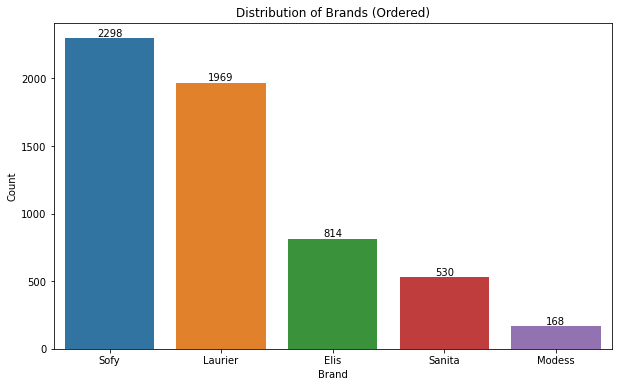

In [7]:
# สร้าง Bar Chart สำหรับ brand
plt.figure(figsize=(10, 6))

sorted_brands = data['brand'].value_counts().index
sns.countplot(x='brand', data=data, order=sorted_brands)

for index, value in enumerate(data['brand'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.title('Distribution of Brands (Ordered)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


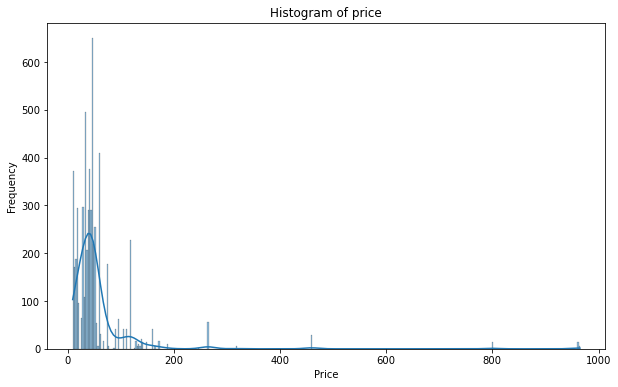

In [8]:
# พล็อต Histogram ของคอลัมน์ 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Histogram of price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [9]:
# พล็อต Histogram ของคอลัมน์ 'sale'
plt.figure(figsize=(10, 6))
sns.histplot(data['sale'], kde=True)
plt.title('Histogram of sale')
plt.xlabel('Sale')
plt.ylabel('Frequency')
plt.show()

In [10]:
# พล็อต Histogram ของคอลัมน์ 'total_sale'
plt.figure(figsize=(10, 6))
sns.histplot(data['total_sale'], kde=True)
plt.title('Histogram of total_sale')
plt.xlabel('Total Sale')
plt.ylabel('Frequency')
plt.show()

In [11]:
# สร้าง Pie chart สำหรับ 'usage'
usage_counts = data['usage'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Pie chart for Usage')
plt.show()

In [12]:
# สร้าง Pie chart สำหรับ 'type'
usage_counts = data['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Pie chart for Type')
plt.show()

In [13]:
# สร้าง Pie chart สำหรับ 'wing'
wing_counts = data['wing'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wing_counts, labels=wing_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart for Wing')
plt.show()

In [14]:
# สร้าง Pie chart สำหรับ 'size'
wing_counts = data['size'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wing_counts, labels=wing_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart for Size')
plt.show()

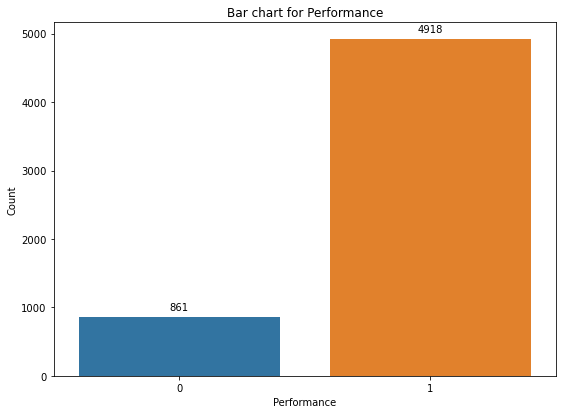

In [15]:
# สร้าง Bar chart สำหรับ 'performance'
plt.figure(figsize=(9, 6.5))
ax = sns.countplot(x='performance', data=data)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Bar chart for Performance')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.show()


In [16]:
#เตรียมข้อมูลและแบ่งชุดข้อมูล
x = data.drop(['total_sale'], axis=1)
y = data['total_sale']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
#แปลงชนิดข้อมูล
categorical_features = ["brand","wing","type","size","usage"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 7.400e+01, 2.900e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.269e+03, 2.200e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 7.480e+02, 2.900e+01,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 9.100e+01, 2.450e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.200e+01, 2.450e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.640e+02, 2.450e+01,
        1.000e+00]])

In [18]:
pd.DataFrame(transformed_x)

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   
2     0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5774  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
5775  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
5776  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
5777  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
5778  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   

       14   15      16      17    18   19  
0     1.0  0.0   10.75    74.0  29.0  1.0  
1     0.0  0.0   33.00  3269.0  22.0  1.0  
2     1.0  0.0   11.00   748.0  29.0  1.0  
3     1.0  0.0   59.00   819.0  29.0  1.0  
4     0.0  1.0   39.00   426.0  22.0  1.0  
...   ...  ...     ...     ...   ...  ...  
5774  1.0  0.0  109.00   180.0  29.0  1.0  
5775  1.0  0.0  960.00   129.0  29.0  1.0  
5776  0.0  1.0  129.00    91.0  24.5  1.0  
5777  0.0  1.0  119.00    62.0  24.5  1.0  
5778  0.0  1.0  129.00   164.0  24.5  1.0  

[5779 rows x 20 columns]

In [19]:
#แก้ไข missing values
imputer = SimpleImputer(strategy='mean')  
data = imputer.fit_transform(transformed_x)

In [20]:
data

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 7.400e+01, 2.900e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.269e+03, 2.200e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 7.480e+02, 2.900e+01,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 9.100e+01, 2.450e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.200e+01, 2.450e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.640e+02, 2.450e+01,
        1.000e+00]])

In [21]:
import numpy as np

# สมมติว่า transformed_x เป็น NumPy array
print(transformed_x.dtype)

float64


In [22]:
# สร้างข้อมูลสำหรับทดสอบ
x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# สร้างและฝึกโมเดล (Random Forest Classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
rf_predictions = rf_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Random Forest Accuracy: 0.90


In [25]:
# สร้างและฝึกโมเดล (CatBoost Classifier)
catboost_model = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
catboost_model.fit(x_train, y_train)

In [26]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
catboost_predictions = catboost_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
catboost_accuracy = accuracy_score(y_test, catboost_predictions)

print(f'CatBoost Accuracy: {catboost_accuracy:.2f}')

CatBoost Accuracy: 0.89


In [27]:
# สร้างและฝึกโมเดล (LightGBM Classifier)
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
lgbm_model.fit(x_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

In [28]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
lgbm_predictions = lgbm_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

print(f'LightGBM Accuracy: {lgbm_accuracy:.2f}')

LightGBM Accuracy: 0.90


In [29]:
# สร้างและฝึกโมเดล (XGBoost Classifier)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
xgb_predictions = xgb_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')

XGBoost Accuracy: 0.90


In [31]:
# สร้าง VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('catboost', catboost_model),
    ('lgbm', lgbm_model),
    ('xgb', xgb_model)
], voting='soft')  

In [32]:
# ทำ VotingClassifier จากแบบจำลองทั้งหมด
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x00000248C71A6280>),
                             ('lgbm',
                              LGBMClassifier(random_state=42, verbose=-1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, devic...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [33]:
# ใช้ VotingClassifier ในการทำนายข้อมูลทดสอบ (หลังจากที่ฝึกไว้แล้ว)
predictions = voting_clf.predict(x_test)

In [34]:
# ประเมินประสิทธิภาพของโมเดลบนข้อมูลทดสอบ
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        93
           1       0.96      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [35]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับ VotingClassifier
voting_probabilities = voting_clf.predict_proba(x_test)[:, 1]

# คำนวณ ROC curve และ AUC
fpr, tpr, thresholds = roc_curve(y_test, voting_probabilities)
roc_auc = auc(fpr, tpr)

# วาด ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'VotingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
